In [62]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [63]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/fake-news US Dataset/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

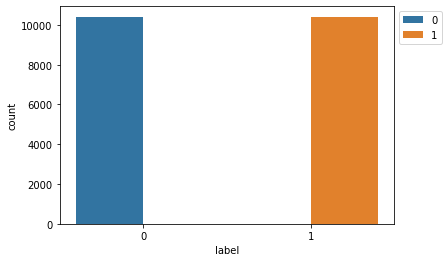

In [ ]:
sns.countplot(x='label',hue='label',data=df)
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [64]:
df=df[['id','title','label']]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   label   20800 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 487.6+ KB


In [66]:
df=df.dropna()

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20242 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 632.6+ KB


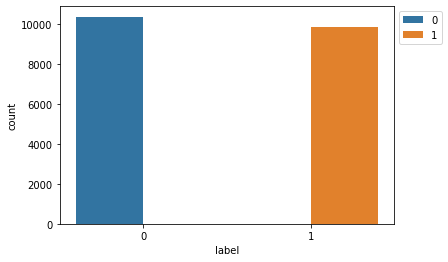

In [68]:
sns.countplot(x='label',hue='label',data=df)
plt.legend(bbox_to_anchor=(1,1))


In [ ]:
df.head()

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1


In [69]:
df.reset_index(inplace=True)

In [70]:
nltk.download('stopwords')
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=[]
for i in range(len(df)):
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-z]',' ',df['title'][i])

  #Convert into Lower Casing
  sent=sent.lower()

  #Steamming
  sent=" ".join([stemmer.stem(word) for word in str(sent).split()])

  #Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_words)])
  corpus.append(sent)
#corpus


In [ ]:
#Stem+BOW
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()
#output
y=df['label']

In [ ]:
temp_df=pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ab,abandon,abba,abc,abduct,abe,abedin,abl,aboard,...,yr,zealand,zen,zero,zika,zionist,zone,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split data into traning and testing
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (16193, 5000)
X_test:- (4049, 5000)
y_train:- (16193,)
y_test:- (4049,)


In [ ]:
#Model_Eval Fun

from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
def model_Eval(y_test,y_pred):

    acc=accuracy_score(y_test,y_pred)
    print("Accuracy :-",acc)
    print("Error rate :-",1-acc)
    print("Precision:-",precision_score(y_test,y_pred,average='weighted'))
    print("Recall:- ",recall_score(y_test,y_pred,average='weighted'))
    print("F1 score :- ",f1_score(y_test,y_pred,average='weighted'))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    plt.figure(figsize=(10,5))

    sns.heatmap(cm,annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted')
    plt.ylabel("Actual")

model created
model traning completed
y_pred completed
ACC for =3:- 80.26673252654976
Accuracy :- 0.8026673252654977
Error rate :- 0.19733267473450233
Precision:- 0.8584541797081081
Recall:-  0.8026673252654977
F1 score :-  0.7964745226495676
[[1307  794]
 [   5 1943]]


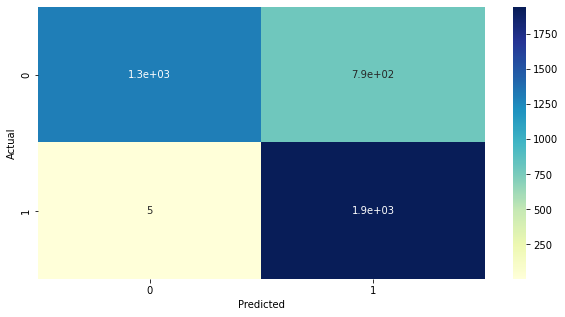

In [ ]:
# create a model k=3,distance=manhatten_distance
from sklearn.neighbors import KNeighborsClassifier
ML_model=KNeighborsClassifier(n_neighbors=3)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

#model Evaluation
model_Eval(y_test,y_pred)

model created
model traning completed
y_pred completed
Accuracy :- 0.766115090145715
Error rate :- 0.233884909854285
Precision:- 0.7702054123921548
Recall:-  0.766115090145715
F1 score :-  0.7659088324760728
[[1518  583]
 [ 364 1584]]


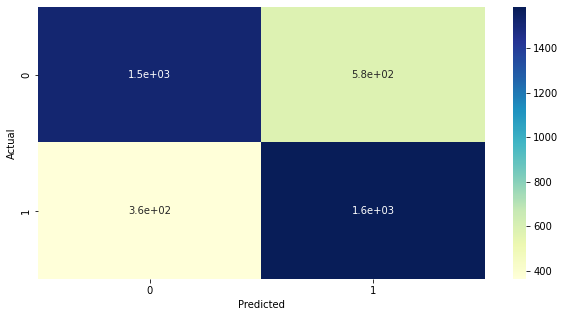

In [ ]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")
#model Evaluation
model_Eval(y_test,y_pred)

model completed
Model traning completed
y_pred completed
Accuracy :- 0.9318350209928378
Error rate :- 0.06816497900716223
Precision:- 0.9345336641945698
Recall:-  0.9318350209928378
F1 score :-  0.9318343806884186
[[1886  215]
 [  61 1887]]


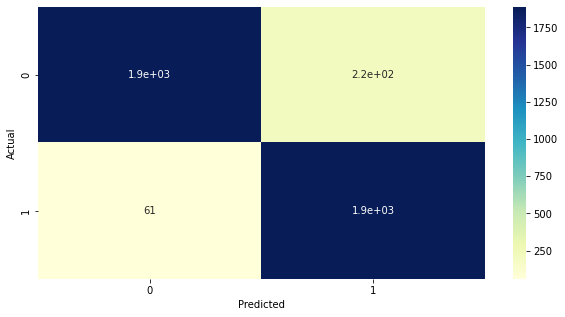

In [ ]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

#SVM

Model created
Model traning completed
y_pred completed
Accuracy :- 0.9296122499382563
Error rate :- 0.07038775006174369
Precision:- 0.9307260453203534
Recall:-  0.9296122499382563
F1 score :-  0.9296355761585534
[[1910  191]
 [  94 1854]]


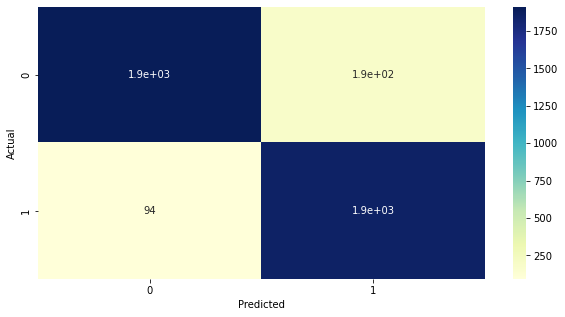

In [ ]:
# create Model for SVM (liner)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="linear")
print("Model created")

# model training
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# model evaluation
model_Eval(y_test,y_pred)

model created
model traning completd
y_pred find
Accuracy :- 0.9083724376389232
Error rate :- 0.09162756236107683
Precision:- 0.9224033169548453
Recall:-  0.9083724376389232
F1 score :-  0.9079452425017336
[[1734  367]
 [   4 1944]]


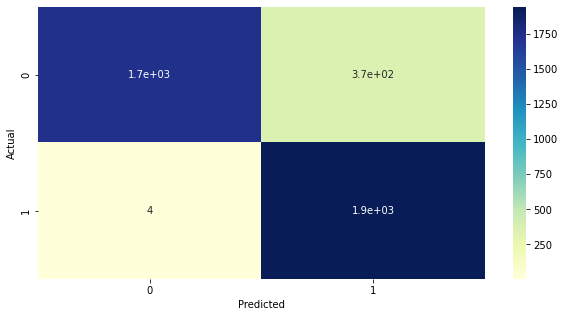

In [ ]:
# created Model for svm (poly)

#model creation
ML_Model=SVC(kernel="poly")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

model created
model traning completd
y_pred find
Accuracy :- 0.9271425043220548
Error rate :- 0.0728574956779452
Precision:- 0.9341012885650287
Recall:-  0.9271425043220548
F1 score :-  0.9270331255681596
[[1828  273]
 [  22 1926]]


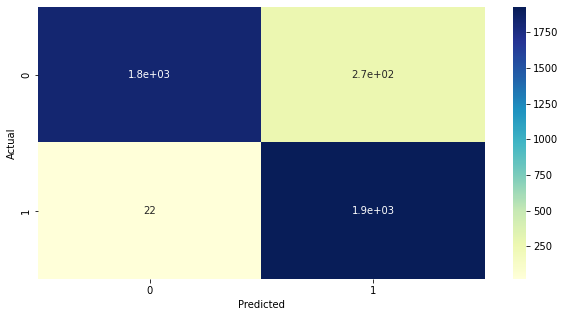

In [ ]:
# created Model for svm (rbf)

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  92.14620894047914
Accuracy :- 0.9214620894047914
Error rate :- 0.07853791059520865
Precision:- 0.9217925180127113
Recall:-  0.9214620894047914
F1 score :-  0.9214867766224736
[[1917  184]
 [ 134 1814]]


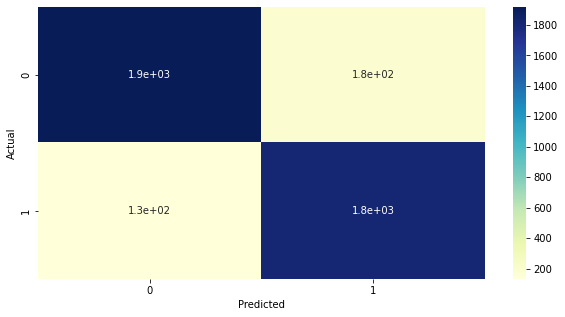

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  75.10496418868856
Accuracy :- 0.7510496418868856
Error rate :- 0.2489503581131144
Precision:- 0.810256998268184
Recall:-  0.7510496418868856
F1 score :-  0.7356148288692546
[[2047   54]
 [ 954  994]]


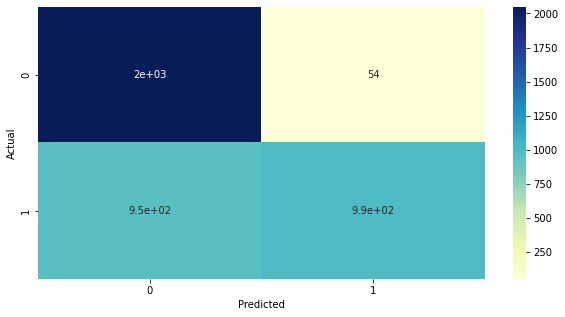

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  92.29439367745123
Accuracy :- 0.9229439367745123
Error rate :- 0.07705606322548775
Precision:- 0.9275500581095847
Recall:-  0.9229439367745123
F1 score :-  0.922895028705734
[[1843  258]
 [  54 1894]]


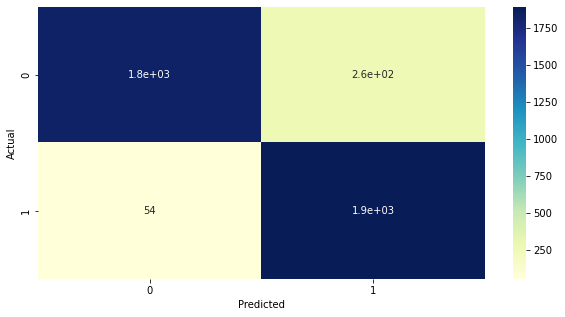

In [ ]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  91.03482341318843
Accuracy :- 0.9103482341318844
Error rate :- 0.08965176586811563
Precision:- 0.9233626267724061
Recall:-  0.9103482341318844
F1 score :-  0.9099732925192306
[[1745  356]
 [   7 1941]]


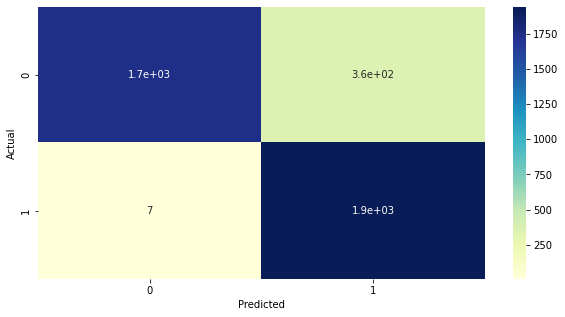

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

#Lemetization and TFIDF

In [71]:
nltk.download('wordnet')
nltk.download('omw-1.4')
corpus=[]
for i in range(len(df)):
  #remove all other char except a-z and A-Z
  sent=re.sub('[^a-zA-z]',' ',df['title'][i])

  #Convert into Lower Casing
  sent=sent.lower()

  #Lemmitizing
  sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])

  #Remove Stopword
  sent=" ".join([word for word in str(sent).split() if(word not in stop_words)])
  corpus.append(sent)
#corpus


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [72]:
#Lemmatizer+TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=30)
X=cv.fit_transform(corpus).toarray()
X
#output
y=df['label']

In [74]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [75]:
!pwd

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [76]:
import joblib
joblib.dump(cv,"cv.pkl")
print("saved")

saved


In [77]:
temp_df=pd.DataFrame(X,columns=cv.get_feature_names())
temp_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,america,american,attack,breitbart,clinton,comment,day,donald,election,email,...,say,state,time,trump,video,war,woman,world,year,york
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.389922,0.468692,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.640027,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0


In [78]:
# split data into traning and testing
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [79]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (16193, 30)
X_test:- (4049, 30)
y_train:- (16193,)
y_test:- (4049,)


model created
model traning completed
y_pred completed
ACC for =3:- 89.8493455174117
Accuracy :- 0.898493455174117
Error rate :- 0.10150654482588295
Precision:- 0.9082399884093685
Recall:-  0.898493455174117
F1 score :-  0.8982060104213814
[[1743  358]
 [  53 1895]]


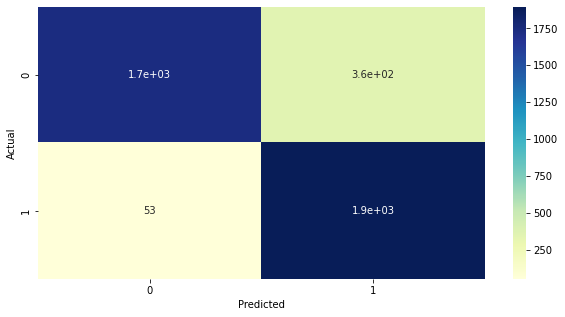

In [80]:
# create a model k=3,distance=manhatten_distance
from sklearn.neighbors import KNeighborsClassifier
ML_model=KNeighborsClassifier(n_neighbors=3)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

#model Evaluation
model_Eval(y_test,y_pred)

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Fake News Classifier


In [82]:
import joblib
joblib.dump(ML_model,"KNN_Model.pkl")
print("saved")

saved


model created
model traning completed
y_pred completed
Accuracy :- 0.8814522104223265
Error rate :- 0.11854778957767353
Precision:- 0.8828221143962847
Recall:-  0.8814522104223265
F1 score :-  0.8814864168744215
[[1806  295]
 [ 185 1763]]


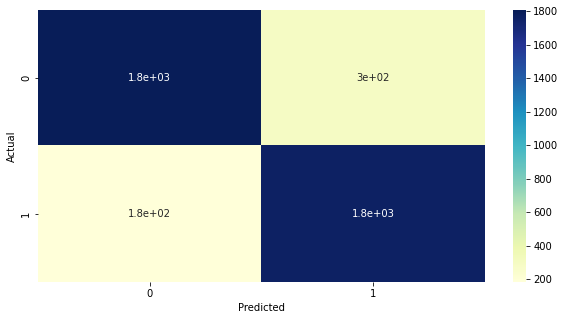

In [83]:
# create a model NB
from sklearn.naive_bayes import GaussianNB
ML_model=GaussianNB()
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")
#model Evaluation
model_Eval(y_test,y_pred)

In [84]:
import joblib
joblib.dump(ML_model,"NB_Model.pkl")
print("saved")

saved


model completed
Model traning completed
y_pred completed
Accuracy :- 0.9078784885156829
Error rate :- 0.09212151148431713
Precision:- 0.9218965780316234
Recall:-  0.9078784885156829
F1 score :-  0.9074489904397486
[[1733  368]
 [   5 1943]]


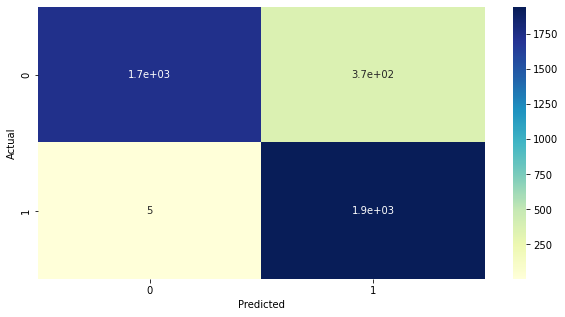

In [85]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
ML_Model=LogisticRegression()
print("model completed")

# model traning
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# LR Eval
model_Eval(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(ML_model,"LogisticRegression_Model.pkl")
print("saved")

Model created
Model traning completed
y_pred completed
Accuracy :- 0.9071375648308224
Error rate :- 0.09286243516917758
Precision:- 0.9218420990322725
Recall:-  0.9071375648308224
F1 score :-  0.9066747535478543
[[1727  374]
 [   2 1946]]


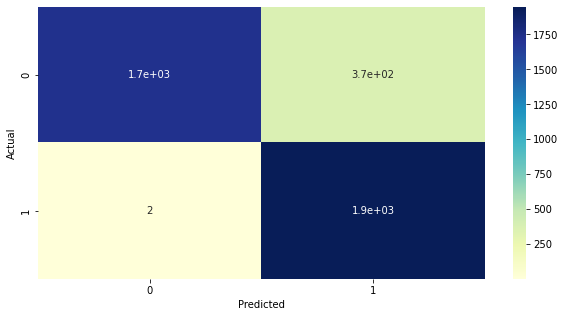

In [86]:
# create Model for SVM (liner)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#model creation
ML_Model=SVC(kernel="linear")
print("Model created")

# model training
ML_Model.fit(X_train,y_train)
print("Model traning completed")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred completed")

# model evaluation
model_Eval(y_test,y_pred)

In [87]:
import joblib
joblib.dump(ML_model,"SVM_linear_Model.pkl")
print("saved")

saved


model created
model traning completd
y_pred find
Accuracy :- 0.9086194122005433
Error rate :- 0.09138058779945668
Precision:- 0.9216674313190223
Recall:-  0.9086194122005433
F1 score :-  0.9082341805605774
[[1741  360]
 [  10 1938]]


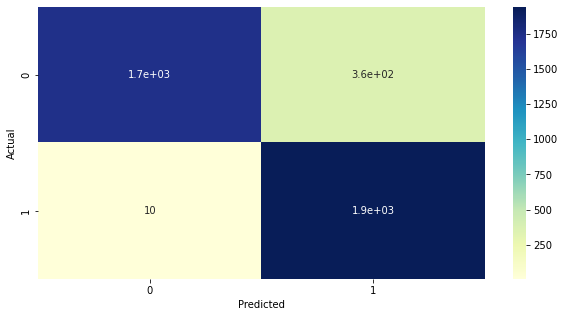

In [88]:
# created Model for svm (poly)

#model creation
ML_Model=SVC(kernel="poly")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

In [89]:
import joblib
joblib.dump(ML_model,"SVM_poly_Model.pkl")
print("saved")

saved


model created
model traning completd
y_pred find
Accuracy :- 0.9088663867621635
Error rate :- 0.09113361323783653
Precision:- 0.9226013422685796
Recall:-  0.9088663867621635
F1 score :-  0.9084542225217562
[[1737  364]
 [   5 1943]]


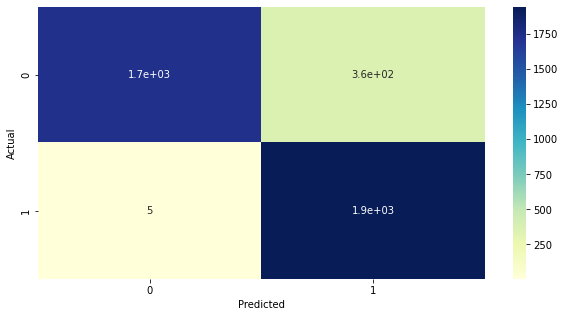

In [90]:
# created Model for svm (rbf)

#model creation
ML_Model=SVC(kernel="rbf")
print('model created')
# model train
ML_Model.fit(X_train,y_train)
print("model traning completd")
#find y_pred
y_pred=ML_Model.predict(X_test)
print("y_pred find")
# model evaluation
model_Eval(y_test,y_pred)

In [91]:
import joblib
joblib.dump(ML_model,"SVM_rbf_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  90.6396641145962
Accuracy :- 0.906396641145962
Error rate :- 0.09360335885403803
Precision:- 0.9177442187973884
Recall:-  0.906396641145962
F1 score :-  0.9060711826254437
[[1748  353]
 [  26 1922]]


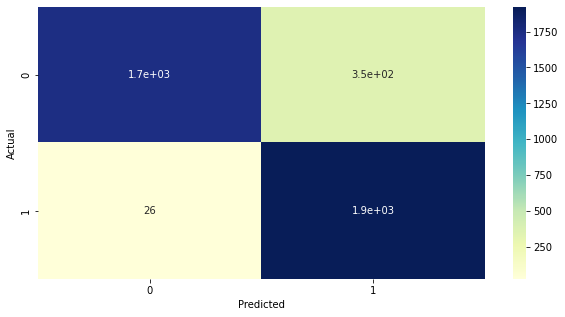

In [92]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# model creation
ML_Model=DecisionTreeClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [93]:
import joblib
joblib.dump(ML_model,"DT_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  90.04692516670782
Accuracy :- 0.9004692516670783
Error rate :- 0.09953074833292175
Precision:- 0.9163558257870308
Recall:-  0.9004692516670783
F1 score :-  0.8999100077845334
[[1705  396]
 [   7 1941]]


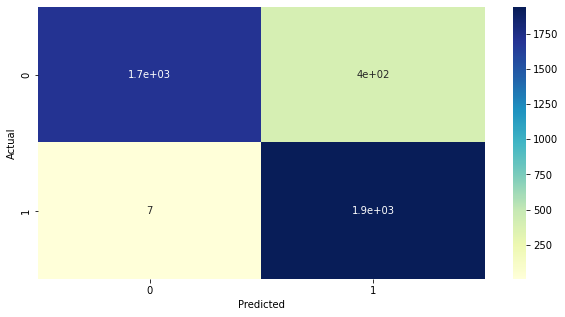

In [94]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# model creation
ML_Model=RandomForestClassifier(max_depth=2)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [95]:
import joblib
joblib.dump(ML_model,"RFC_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  90.73845393924425
Accuracy :- 0.9073845393924426
Error rate :- 0.09261546060755743
Precision:- 0.919742827757308
Recall:-  0.9073845393924426
F1 score :-  0.9070215972039883
[[1743  358]
 [  17 1931]]


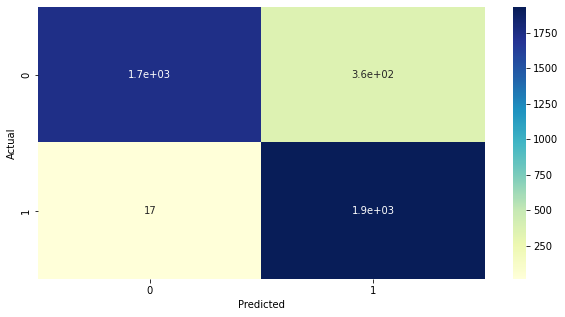

In [96]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [97]:
import joblib
joblib.dump(ML_model,"ADB_Model.pkl")
print("saved")

saved


mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  90.78784885156828
Accuracy :- 0.9078784885156829
Error rate :- 0.09212151148431713
Precision:- 0.9222083574650817
Recall:-  0.9078784885156829
F1 score :-  0.9074359407099859
[[1731  370]
 [   3 1945]]


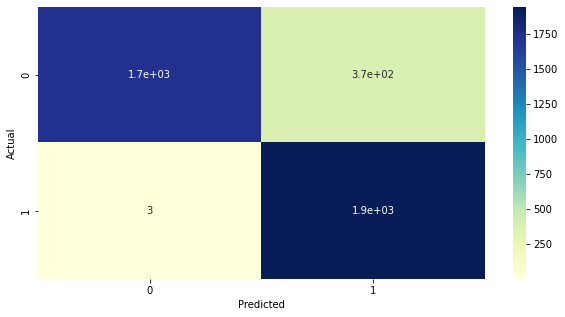

In [98]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [99]:
import joblib
joblib.dump(ML_model,"XGB_Model.pkl")
print("saved")

saved
